In [14]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import os

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#Import tensorflow
import tensorflow as tf
from tensorflow import keras  
from tensorflow.keras import layers  

#image preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

import os
import zipfile
zip_path = "/Users/test/Desktop/Data_Science/AI Certificate/Deep Learning/M3 CNNs/Waste Recognition/archive.zip"
zip_ref = zipfile.ZipFile(zip_path,'r')
zip_ref.extractall('/Users/test/Desktop/Data_Science/AI Certificate/Deep Learning/M3 CNNs/Waste Recognition/waste')
zip_ref.close()

In [4]:
base_dir = '/Users/test/Desktop/Data_Science/AI Certificate/Deep Learning/M3 CNNs/Waste Recognition/waste'
train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

In [5]:
train_org_dir = os.path.join(train_dir,'O')
train_rec_dir = os.path.join(train_dir,'R')
test_org_dir = os.path.join(test_dir,'O')
test_rec_dir = os.path.join(test_dir,'R')

In [6]:
train_org_fnames = os.listdir(train_org_dir)
print(train_org_fnames[:10])

train_rec_fnames = os.listdir(train_rec_dir)

['O_10470.jpg', 'O_8588.jpg', 'O_7863.jpg', 'O_12267.jpg', 'O_9696.jpg', 'O_12501.jpg', 'O_10316.jpg', 'O_5912.jpg', 'O_11008.jpg', 'O_10302.jpg']


In [7]:
print('total training organic images:', len(os.listdir(train_org_dir)))
print('total training recyclable images:', len(os.listdir(train_rec_dir)))
print('total test organic images:', len(os.listdir(test_org_dir)))
print('total test recyclable images:', len(os.listdir(test_rec_dir)))

total training organic images: 12565
total training recyclable images: 9999
total test organic images: 1401
total test recyclable images: 1112


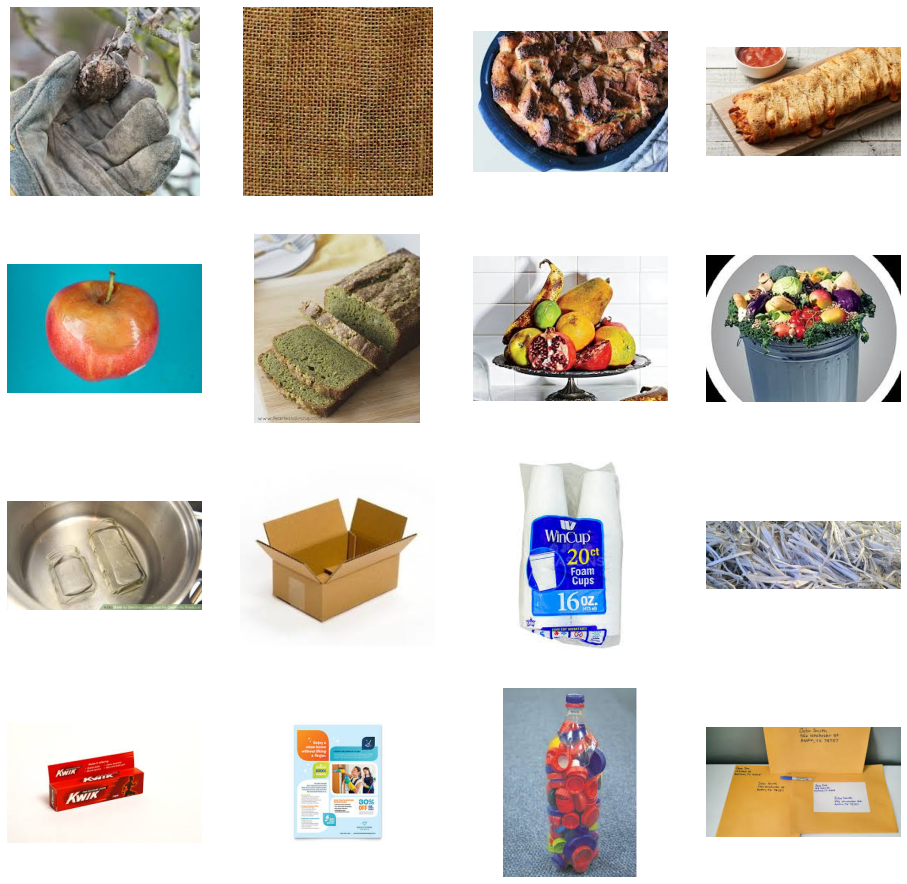

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_org_pic = [os.path.join(train_org_dir,fname)
                            for fname in train_org_fnames[pic_index-8:pic_index]]
next_rec_pic = [os.path.join(train_rec_dir,fname)
               for fname in train_rec_fnames[pic_index-8:pic_index]]
for i, img_path in enumerate(next_org_pic+next_rec_pic):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()
                             


In [9]:
#data augmentation for the sake of trying it

datagen = ImageDataGenerator(rotation_range = 30,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            shear_range = 0.5,
                            zoom_range = 0.6,
                            horizontal_flip = True,
                            fill_mode = 'nearest')

In [10]:
train_gen = datagen.flow_from_directory(train_dir,
                                       target_size = (244,244),
                                        batch_size = 20,
                                        class_mode = 'binary')

Found 22564 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 244, 244, 3)
labels batch shape: (20,)
